# What is machine learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [ ]:
# Start pylab inline mode, so figures will appear in the notebook
%matplotlib inline
from matplotlib import pyplot as plt

## Classification

Example:

<img src="img/separator.png" width=60%>

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

/home/nelson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


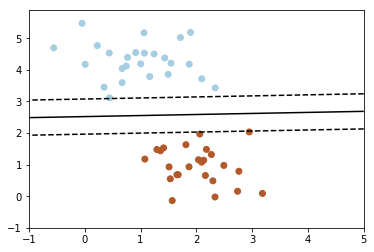

In [2]:
# The code generating the example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs


def plot_sgd_separator():
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

    # fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01,
                        n_iter=200, fit_intercept=True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    ax = plt.axes()
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')


if __name__ == '__main__':
    plot_sgd_separator()
    plt.show()

## Regression

Example:

<img src="img/regression.png" width=60%>

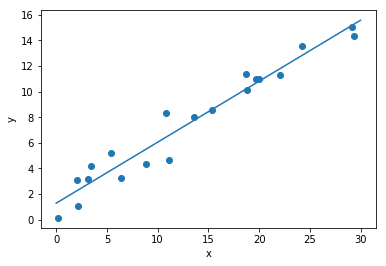

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def plot_linear_regression():
    a = 0.5
    b = 1.0

    # x from 0 to 10
    x = 30 * np.random.random(20)

    # y = a*x + b with noise
    y = a * x + b + np.random.normal(size=x.shape)

    # create a linear regression classifier
    clf = LinearRegression()
    clf.fit(x[:, None], y)

    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = clf.predict(x_new[:, None])

    # plot the results
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.axis('tight')


if __name__ == '__main__':
    plot_linear_regression()
    plt.show()


Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

# Representation and Visualization of Data

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

By the end of this section you should:

- Know the internal data representation of scikit-learn.
- Know how to use scikit-learn's dataset loaders to load example data.
- Know how to use matplotlib to help visualize different types of data.

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

### A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.  There are three species of iris
in the dataset, which we can picture here:

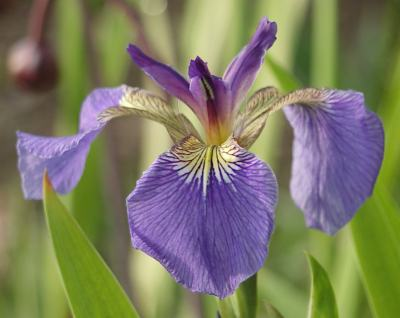

Iris Setosa



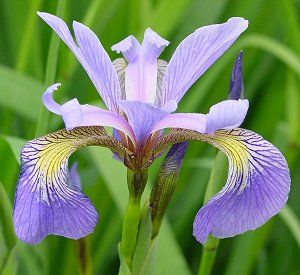

Iris Versicolor



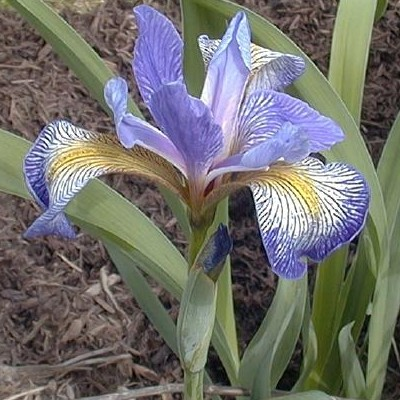

Iris Virginica


In [4]:
from IPython.core.display import Image, display
display(Image(filename='img/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='img/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='img/iris_virginica.jpg'))
print("Iris Virginica")

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [13]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [14]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
print(iris.data[0])

150
4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [15]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [16]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [17]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot. 

Text(0,0.5,'sepal width (cm)')

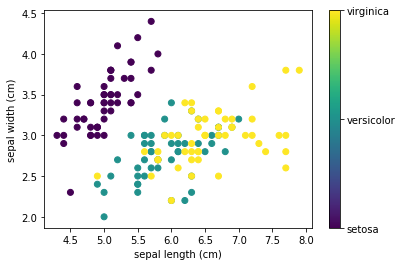

In [11]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Other Available Data

Scikit-learn makes available a host of datasets for testing learning algorithms.
They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    datasets.load_<TAB>

or

    datasets.fetch_<TAB>

or

    datasets.make_<TAB>

to see a list of available functions.

In [ ]:
# from sklearn import datasets


The data downloaded using the ``fetch_`` scripts are stored locally,
within a subdirectory of your home directory.
You can use the following to determine where it is:

`from sklearn.datasets import get_data_home
get_data_home()`

**Be warned**: many of these datasets are quite large, and can take a long time to download!
(especially on Conference wifi).

If you start a download within the IPython notebook
and you want to kill it, you can use ipython's "kernel interrupt" feature, available in the menu.

## Loading Digits Data

Now we'll take a look at another dataset, one where we have to put a bit
more thought into how to represent the data.  We can explore the data in
a similar manner as above:

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [26]:
n_samples, n_features = digits.data.shape
print(n_samples, n_features)

1797 64


In [31]:
print(digits.data[0])
print(digits.target)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]


The target here is just the digit represented by the data.  The data is an array of
length 64... but what does this data mean?

There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [27]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


We can see that they're related by a simple reshaping:

In [23]:
import numpy as np    # numpy!
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


*Aside... numpy and memory efficiency:*

*You might wonder whether duplicating the data is a problem.  In this case, the memory
overhead is very small.  Even though the arrays are different shapes, they point to the
same memory block, which we can see by doing a bit of digging into the guts of numpy:*

In [24]:
print(digits.data.__array_interface__['data'])
print(digits.images.__array_interface__['data'])

(94238541718400, False)
(94238541718400, False)


*The long integer here is a memory address: the fact that the two are the same tells
us that the two arrays are looking at the same data.*

Let's visualize the data.  It's little bit more involved than the simple scatter-plot
we used above, but we can do it rather quickly.

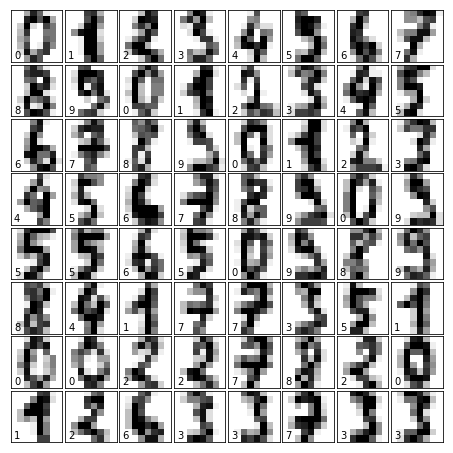

In [28]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We see now what the features mean.  Each feature is a real-valued quantity representing the
darkness of a pixel in an 8x8 image of a hand-written digit.

Even though each sample has data that is inherently two-dimensional, the data matrix flattens
this 2D data into a **single vector**, which can be contained in one **row** of the data matrix.

## Exercise: working with the faces dataset

In [29]:
from sklearn.datasets import fetch_olivetti_faces

- fetch the faces data
- Use a script like above to plot the faces image data.

  hint: plt.cm.bone is a good colormap for this data

### Solution:

In [ ]:

# faces = fetch_olivetti_faces()

# # set up the figure
# fig = plt.figure(figsize=(6, 6))  # figure size in inches
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# # plot the faces:
# for i in range(64):
#     ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
#     ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')